In [64]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [65]:
dataDir='/mnt/raid_storage/05_Datasets/mscoco/coco_dataset'
dataType='val2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [66]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=3.42s)
creating index...
index created!


In [67]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format('\n'.join(nms)))

COCO categories: 
person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush

COCO supercategories: 
kitchen
food
person
furniture
appliance
outdoor
accessory
indoor
electronic
animal
vehicle
sports


In [68]:
# get all images containing given categories, select one at random
# catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
catIds = coco.getCatIds(catNms=['person','dog']);
imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds();
# imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(len(imgIds))

676


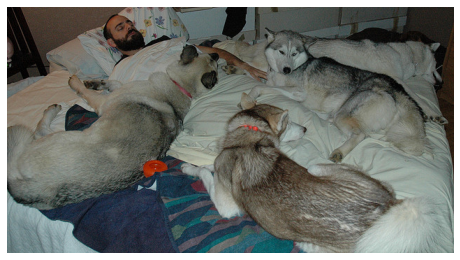

In [69]:
# load and display image
I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

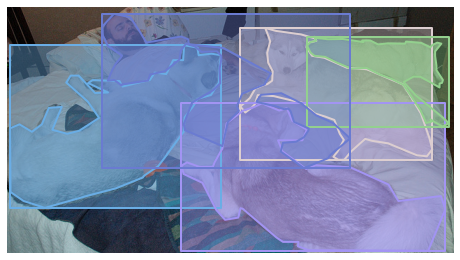

In [70]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [71]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=1.06s)
creating index...
index created!


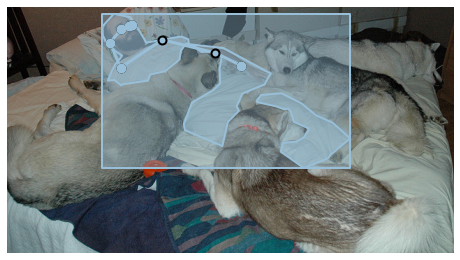

In [72]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns, draw_bbox=True)

In [73]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.19s)
creating index...
index created!


A man laying in bed with four dogs.
a number of dogs in a bed with a person
Three black and white dogs laying in bed with a man.
Man with beard lying in bed with three Husky type dogs.
a man sleeping in his bed with three dogs


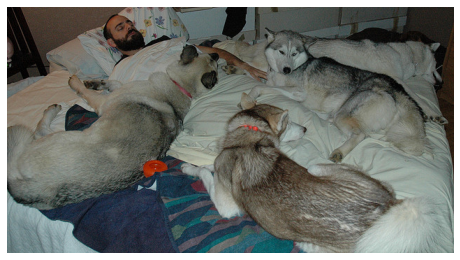

In [74]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

In [75]:
c = (np.random.random((80, 3))*0.6+0.4).tolist()

In [76]:
c

[[0.5186354769186101, 0.9102324469791906, 0.6026872568435723],
 [0.717539428449508, 0.7356489351602482, 0.6648129641676199],
 [0.453981545339332, 0.9358129005489603, 0.4647248142150273],
 [0.6955054112474202, 0.8917689726407075, 0.7021881803602523],
 [0.769027783478729, 0.7902512514827105, 0.5775792740211146],
 [0.8598426532233153, 0.5057308529672359, 0.9929877379727199],
 [0.8751720188756257, 0.4953045487251147, 0.63158638345366],
 [0.6607841955974141, 0.622033038819001, 0.9666955083490734],
 [0.7475865225749037, 0.49279322300251704, 0.6717251558169333],
 [0.7711654519818645, 0.8668274244561827, 0.4348843960311686],
 [0.9537961699935606, 0.685715095313441, 0.5115405006365673],
 [0.766691547447276, 0.5698189099359001, 0.8627401075455439],
 [0.8977595143175814, 0.7533860716884164, 0.7118427498477301],
 [0.7000979951892623, 0.791456837958453, 0.9603622507676496],
 [0.472367405531229, 0.7707628328807481, 0.609320051506015],
 [0.7358079584711772, 0.9535298736264223, 0.5166139729540422],
 [

In [77]:
class_list = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck",
                      "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
                      "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
                      "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
                      "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
                      "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl",
                      "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza",
                      "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table", "toilet",
                      "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven",
                      "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear",
                      "hair drier", "toothbrush"]

In [78]:
len(class_list) == len(c)

True

In [82]:
x_top = [212.6, 13.43, 278.13, 273.48, 272.83, 213.12, 387.0, 494.31, 282.37, 526.17, 491.51, 477.88, 308.98, 71.97]

In [90]:
(np.array(x_top)/480).tolist()

[0.4429166666666667,
 0.027979166666666666,
 0.5794374999999999,
 0.5697500000000001,
 0.5683958333333333,
 0.444,
 0.80625,
 1.0298125,
 0.5882708333333333,
 1.0961874999999999,
 1.0239791666666667,
 0.9955833333333334,
 0.6437083333333333,
 0.1499375]